# FW functions


In [2]:
import sys
sys.path.insert(0, '/home/ejafari/alignment/Git/src/')
from utils import *
from AIscEA import *
from evals import *
from rmCls import *
from similarity import *
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# RNA and ATAC

AnnData object with n_obs × n_vars = 19322 × 5081
AnnData object with n_obs × n_vars = 5081 × 19322
5081
19322


Trying to set attribute `.obs` of view, copying.


AnnData object with n_obs × n_vars = 5081 × 15028
    obs: 'n_genes'
    var: 'n_cells'
5081
15028
View of AnnData object with n_obs × n_vars = 5081 × 15028
    obs: 'n_genes'
    var: 'n_cells'
View of AnnData object with n_obs × n_vars = 5081 × 3724
    obs: 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
         Falling back to preprocessing with `sc.pp.pca` and default params.


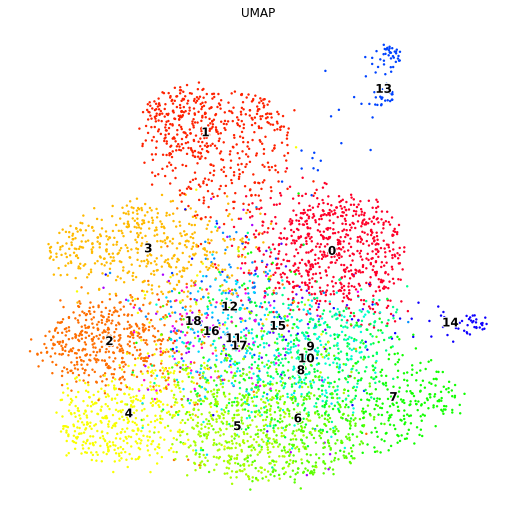

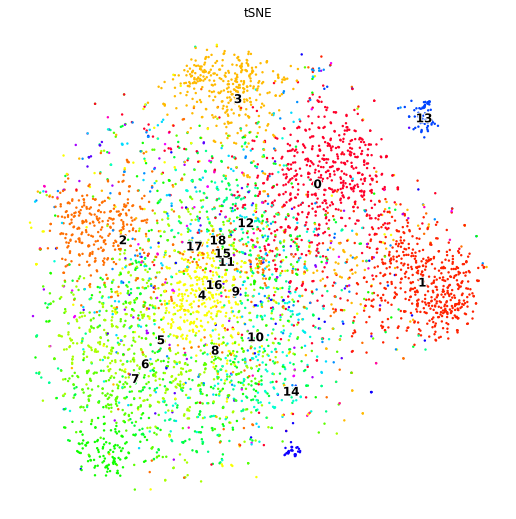

0 : 703
1 : 562
2 : 495
3 : 491
4 : 476
5 : 460
6 : 432
7 : 279
8 : 220
9 : 216
10 : 192
11 : 137
12 : 97
13 : 91
14 : 64
15 : 52
16 : 43
17 : 39
18 : 32


In [6]:
############################ High_var = True ######################################
input_dir = "/home/ejafari/alignment/downstream/data/SNAREseq/Mouse/5k/"
scRNAseq_adrs = input_dir + 'scRNAseq.csv'
# Find marker genes of scRNAseq data
markers_rna, rna = scRNAseq_clustering_original(scRNAseq_adrs, filtering=True, resl=1.62, highly_var=True, tr=True)


AnnData object with n_obs × n_vars = 9 × 5081
AnnData object with n_obs × n_vars = 5081 × 9


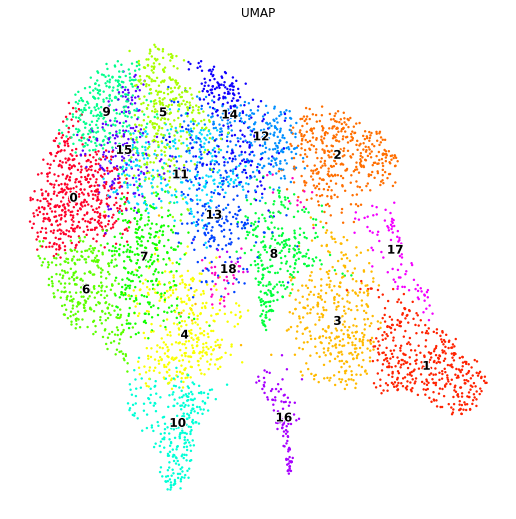

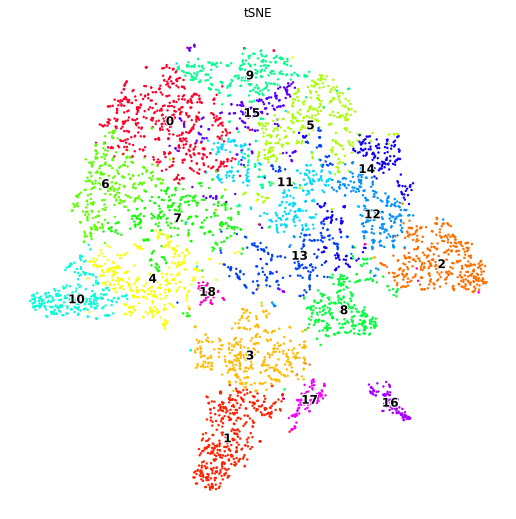

0 : 499
1 : 405
2 : 377
3 : 368
4 : 338
5 : 334
6 : 293
7 : 291
8 : 286
9 : 278
10 : 259
11 : 257
12 : 234
13 : 232
14 : 214
15 : 177
16 : 109
17 : 85
18 : 45


In [7]:
# Find clusters of low dimensional cisTopic result for scATACseq

atac = clustering(input_dir + 'cisTopic_topics.tsv', transpose=True, resl=1.55)

############################ scATAC ######################################
# 1) Put cisTopic clusters and embedding values on the original data and 2) find marker genes and their logFC
f_original = 'pred_matrix_closest_genes_1k_downstream_strand_first_prom.csv'
markers_atac, atac_cis_on_org = process_cisTopic_on_orig(atac, f_original, input_dir, save=False, transpose=True)



In [6]:
# sc.pl.umap(atac_cis_on_org, color=['leiden'], legend_loc='on data', legend_fontsize=18, legend_fontoutline=4,frameon=True, title='UMAP ATACseq', palette='gist_rainbow', save='UMAP_ATAC_5k_all.svg')#
# sc.pl.umap(rna, color=['leiden'], legend_loc='on data', legend_fontsize=18, legend_fontoutline=4,frameon=True, title='UMAP RNAseq', palette='gist_rainbow', save='UMAP_RNA_5k_all.svg')#

# Cell-type mapping

## Min_cells: 200

In [8]:
rna, atac_cis_on_org,  markers_rna, markers_atac = rm_tiny_cluster(rna, atac_cis_on_org,markers_rna, markers_atac, min_cells=200, rm_correspondence=False)

RNA: 12
RNA: 11
RNA: 14
RNA: 10
RNA: 16
RNA: 15
RNA: 17
RNA: 13
RNA: 18
ATAC: 16
ATAC: 15
ATAC: 17
ATAC: 18


In [9]:
##### Double check the true mappings using cell labels

df_cells_common = pd.DataFrame()

for cls_rna in sorted(set(rna.obs['leiden'])):
    for cls_atac in sorted(set(atac_cis_on_org.obs['leiden'])):
        cells_atac  = atac_cis_on_org.obs[atac_cis_on_org.obs['leiden'] == str(cls_atac)].index
        cells_rna = rna.obs[rna.obs['leiden'] == str(cls_rna)].index
        df_cells_common.loc[('r_' + str(cls_rna)), ('a_' + str(cls_atac))] = len(set(cells_atac) & set(cells_rna))
        
df_cells_common




,a_0,a_1,a_10,a_11,a_12,a_13,a_14,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9
r_0,9.0,4.0,4.0,57.0,132.0,15.0,27.0,295.0,19.0,9.0,31.0,5.0,3.0,8.0,11.0
r_1,3.0,341.0,1.0,0.0,2.0,2.0,0.0,2.0,163.0,2.0,1.0,1.0,3.0,9.0,0.0
r_2,33.0,5.0,23.0,17.0,1.0,17.0,6.0,2.0,29.0,50.0,16.0,155.0,110.0,2.0,13.0
r_3,5.0,32.0,7.0,11.0,11.0,80.0,14.0,22.0,35.0,28.0,11.0,3.0,13.0,199.0,3.0
r_4,9.0,2.0,187.0,9.0,1.0,11.0,3.0,3.0,16.0,159.0,6.0,19.0,30.0,3.0,3.0
r_5,198.0,3.0,9.0,27.0,2.0,20.0,2.0,2.0,9.0,12.0,22.0,38.0,34.0,3.0,52.0
r_6,82.0,1.0,7.0,19.0,1.0,15.0,12.0,2.0,11.0,20.0,72.0,19.0,25.0,8.0,77.0
r_7,13.0,3.0,1.0,13.0,18.0,11.0,100.0,10.0,15.0,12.0,34.0,2.0,9.0,10.0,14.0
r_8,26.0,0.0,2.0,21.0,13.0,12.0,11.0,7.0,10.0,4.0,42.0,7.0,12.0,0.0,30.0
r_9,35.0,0.0,4.0,22.0,20.0,8.0,16.0,10.0,11.0,5.0,38.0,3.0,6.0,3.0,26.0


In [10]:
col_ind, rna, atac_cis_on_org = extract_mapped_clusters(rna, markers_rna, atac_cis_on_org, markers_atac, p_val_count=6)

0.0
0.0 [12  3  7  2  6  0  5 11 14  9]
[12  3  7  2  6  0  5 11 14  9]
P-value:  {(8, 14): 0.0, (7, 11): 0.0, (9, 9): 0.0, (2, 7): 0.0, (6, 5): 0.0, (5, 0): 0.0, (0, 12): 0.0, (3, 2): 0.0, (4, 6): 0.0, (1, 3): 0.0}
$$$$$$$ 
 
0.1
0.1 [ 2  1  6  8  4  0  9  5 14  7]
[ 2  1  6  8  4  0  9  5 14  7]
P-value:  {(9, 7): 0.0, (7, 5): 0.0, (2, 6): 0.0, (8, 14): 0.0, (6, 9): 0.0, (0, 2): 0.0, (5, 0): 0.0, (3, 8): 0.0030000000000000027, (4, 4): 0.0, (1, 1): 0.0}
$$$$$$$ 
 
0.2
0.2 [ 2  1  6  8 10  0  9  5 14  4]
[ 2  1  6  8 10  0  9  5 14  4]
P-value:  {(9, 4): 0.0, (7, 5): 0.0, (6, 9): 0.0, (2, 6): 0.0, (8, 14): 0.0, (5, 0): 0.0, (0, 2): 0.0, (3, 8): 0.0, (4, 10): 0.0, (1, 1): 0.0}
$$$$$$$ 
 
0.30000000000000004
0.3 [ 2  1  4  8 10  0  9  6 14  7]
[ 2  1  4  8 10  0  9  6 14  7]
P-value:  {(6, 9): 0.0, (2, 4): 0.0, (8, 14): 0.0, (9, 7): 0.0, (7, 6): 0.0, (0, 2): 0.0, (5, 0): 0.0, (4, 10): 0.0, (3, 8): 0.0, (1, 1): 0.0}
$$$$$$$ 
 
0.4
0.4 [ 2  1  4  7  9  0 13  6  5]
[ 2  1  4  7  9  0 13  6 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,3.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
5,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
9,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0



Mapped clusters between Domain1 and Domain2:  {0: 2, 1: 1, 3: 8, 4: 10, 5: 0}

Removing non-significant clusters.


# Cell-cell alignment in AIscEA

In [22]:
aligns_dict = AIscEA(col_ind, rna, markers_rna, atac_cis_on_org, markers_atac)

0
167 111
88751 19598
Intersect:  94
0 2
RNA:  (703, 35)
ATAC:  (377, 18293)
------------------------before Kmeans----------------------
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 0.1804795265197754
After combining multi-cells:  (377, 35)
------------------------after Kmeans----------------------
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 3.931251287460327
------------------------after multicells----------------------
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 4.386353015899658
1 1
RNA:  (562, 61)
ATAC:  (405, 18835)
------------------------before Kmeans----------------------
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 4.4363086223602295
After combining multi-cells:  (405, 61)
------------------------after Kmeans----------------------
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 11.982207298278809
------------------------after multicells----------------------
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 12.458967208862305
3 8
RNA:  (491, 16)
ATAC:  (286, 17258)
------------------------before Kmeans----------------------
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 12.5019221

## Cluster mapping accuracy

In [5]:
# Double check the true mappings using cell labels

df_cells_common = pd.DataFrame()

for cls_rna in sorted(set(rna.obs['leiden'])):
    for cls_atac in sorted(set(atac_cis_on_org.obs['leiden'])):
        cells_atac  = atac_cis_on_org.obs[atac_cis_on_org.obs['leiden'] == str(cls_atac)].index
        cells_rna = rna.obs[rna.obs['leiden'] == str(cls_rna)].index
        df_cells_common.loc[('r_' + str(cls_rna)), ('a_' + str(cls_atac))] = len(set(cells_atac) & set(cells_rna))
        
df_cells_common

# 0:2, 1:1, 3:8, 5:0, 4:10

,a_0,a_1,a_10,a_2,a_8
r_0,9.0,4.0,4.0,295.0,8.0
r_1,3.0,341.0,1.0,2.0,9.0
r_3,5.0,32.0,7.0,22.0,199.0
r_4,9.0,2.0,187.0,3.0,3.0
r_5,198.0,3.0,9.0,2.0,3.0


In [18]:
# Double check the true mappings using cell labels
import pickle
import pandas as pd
df_cells_common = pd.DataFrame(columns=['overlap', 'union', 'jacc', 'overlap/min'])
out_dir = "/home/ejafari/alignment/downstream/notebooks/FW_cluster_cell_names/Mus_5k/"
cls_overlap_dict = dict()

for cls_rna in sorted(set(rna.obs['leiden'])):
    cls_atac = str(col_ind_cor[int(cls_rna)])
    cells_atac  = atac_cis_on_org.obs[atac_cis_on_org.obs['leiden'] == str(cls_atac)].index
    cells_rna = rna.obs[rna.obs['leiden'] == str(cls_rna)].index
    overlap = set(cells_atac) & set(cells_rna)
    n_overlapping = len(overlap)
    cls_overlap_dict[cls_rna + "_" + cls_atac] = overlap
    

        
    n_union = len(set(cells_rna).union(cells_atac))
    jacc = n_overlapping/n_union
    overlap_min = n_overlapping/min(len(cells_rna), len(cells_atac))
    df_cells_common.loc['r_' + str(cls_rna) + '_a_' + str(cls_atac)] = [n_overlapping, n_union, jacc, overlap_min]

    print(cls_rna, cls_atac, len(cells_rna), len(cells_atac), n_union, n_overlapping, jacc) 
    
    # Save overlapping cell names in mapped clusters
with open(out_dir + 'overlap_mapped_clusters.pickle', 'wb') as handle:
    pickle.dump(cls_overlap_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
df_cells_common

# 0:2, 1:1, 3:8, 5:0, 4:10

0 2 703 377 785 295 0.37579617834394907
1 1 562 405 626 341 0.5447284345047924
3 8 491 286 578 199 0.34429065743944637
4 10 476 259 548 187 0.34124087591240876
5 0 460 499 761 198 0.26018396846254926


,overlap,union,jacc,overlap/min
r_0_a_2,295.0,785.0,0.375796,0.782493
r_1_a_1,341.0,626.0,0.544728,0.841975
r_3_a_8,199.0,578.0,0.344291,0.695804
r_4_a_10,187.0,548.0,0.341241,0.722008
r_5_a_0,198.0,761.0,0.260184,0.430435
